In [ ]:
!pip install gym
!pip install stable-baselines3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 170 kB 33.1 MB/s 
     |████████████████████████████████| 1.5 MB 53.1 MB/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616824 sha256=e9650f3cda20057090b12f204b62422d2b887f2e016823099e1ba0c27aa4a49b
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [ ]:
#IMPORTO TODAS LAS LIBRERIAS

#Ejercicio 1 MG
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import mixture

#Ejercicio 2 MG
from keras.layers import Dense, Flatten, Reshape, Input
from keras.models import Sequential, Model

#Ejercicio 3MG
from keras.models import Model
from keras.losses import MSE
from keras.layers import  Layer
import tensorflow as tf

#Ejercicio 1 RL
import gym
import itertools
import sys
from collections import defaultdict
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D


#Ejercicio 2 RL
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

#Ejercicio 3 RL
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack



---



---



#TAREAS DEL MÓDULO DE GENERATIVOS

## Ejercicio 1

Implementa un modelo generativo de FashionMNIST basado en PCA y GMM. Evalúa y comenta los autovectores, visualizandolos de manera apropiada.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Normalizo
x_train = (x_train/255. - 0.5) * 2.
x_test = (x_test/255. - 0.5) * 2.

In [ ]:
# Concateno x_train y x_test para unir todos los datos
x = np.concatenate((x_train, x_test), axis=0)

In [ ]:
x=x.reshape(70000, 784)

In [ ]:
# Hacemos PCA
pca = PCA()

In [ ]:
#Entrenamos los datos en los componentes principales
components = pca.fit_transform(X=x)

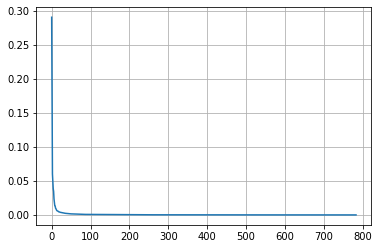

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.grid()

# El primero explica cerca del 30% de toda la varianza de los datos.

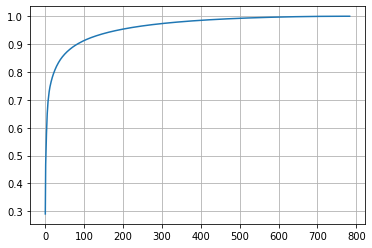

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()

# Teniendo en cuenta esta grafica si cogieramos solamente menos del 100€ de los datos, explicariamos mas o menos el 90% de los datos

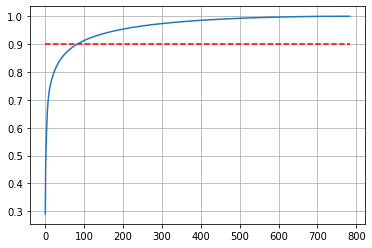

In [ ]:
plt.plot(np.ones(784)*0.9, "--", c="r")
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()
#  Confirmamos la explicación anterior aplicando un threshold de 90%

In [ ]:
np.argmax(pca.explained_variance_ratio_.cumsum() > 0.9)

# Para concretar el dato realizamos un argmax para que nos diga que necesitamos 83 componente para explicar el 90% de la varianza

83

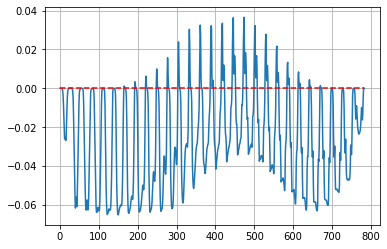

In [ ]:
plt.plot(-pca.components_[0])
plt.plot(np.zeros(784), "--", c="r")
plt.grid()

In [ ]:
pca_optimized_component = PCA(n_components=83)
components = pca_optimized_component.fit_transform(x)
#Creamos el modelo de 2 componentes y se lo aplicamos a nuestro modelo

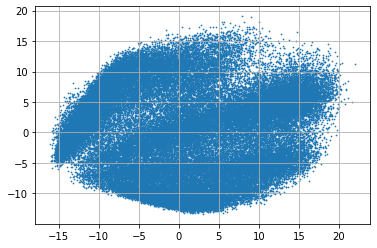

In [ ]:
plt.scatter(components[:, 0], components[:, 1], s=0.5)
plt.grid()

In [ ]:
def gridsearchgmm(data, opt_ncomponents, opt_covariance):
    results = []
    for ncomponents in opt_ncomponents:
        for covariance in opt_covariance:
            gmm_trial = GaussianMixture(n_components=ncomponents, covariance_type=covariance)
            gmm_trial.fit(data)
            bic = gmm_trial.bic(data)
            print("ncomponents {}, covariance {}, bic is {}".format(ncomponents, covariance, bic))
            results.append(bic)
    return results

In [ ]:
opt_ncomponents = np.arange(1,8)
opt_covariance = ["diag", "full", "spherical"]
results = gridsearchgmm(components, opt_ncomponents, opt_covariance)

# el resultado sería elegir el bic mas pequeño

ncomponents 1, covariance diag, bic is 14942363.665324885
ncomponents 1, covariance full, bic is 14980328.385847954
ncomponents 1, covariance spherical, bic is 22783274.077718634
ncomponents 2, covariance diag, bic is 14630065.195362637
ncomponents 2, covariance full, bic is 11991948.877000932
ncomponents 2, covariance spherical, bic is 21250980.39170186
ncomponents 3, covariance diag, bic is 14442563.63687268
ncomponents 3, covariance full, bic is 9619685.447886089
ncomponents 3, covariance spherical, bic is 20224638.464886624
ncomponents 4, covariance diag, bic is 14287502.830724586
ncomponents 4, covariance full, bic is 7959051.230874642
ncomponents 4, covariance spherical, bic is 19551063.529873054
ncomponents 5, covariance diag, bic is 14200373.312782982
ncomponents 5, covariance full, bic is 7210659.335910477
ncomponents 5, covariance spherical, bic is 19049139.567251515
ncomponents 6, covariance diag, bic is 14126359.80232759
ncomponents 6, covariance full, bic is 6624978.023668

In [ ]:
gmm2 = GaussianMixture(n_components=7, covariance_type="full")
gmm2.fit(components)

# Hacemos un GaussianMixture al bic seleccionado y le hacemos un fit porque solo entrenamos el modelo generativo, sin el transform

GaussianMixture(n_components=7)

In [ ]:
gmm2.sample()

(array([[ 4.71624604, -5.74976129, -2.29110382,  0.54186632,  2.09482423,
          4.35394895, -1.20169984, -0.33680755,  0.88619361, -0.80732809,
          1.11805069, -0.50005471, -0.09576554, -0.14684257, -0.80377881,
         -0.4010027 , -0.58043095, -0.25677869, -0.19092764,  0.27961794,
         -0.65590427, -0.17721195, -0.5820238 , -0.06533794, -0.54438179,
         -0.909271  ,  0.61814425, -0.09003684,  0.87740155, -1.2847841 ,
          0.11501238, -0.0785382 , -0.33637573, -0.02655236, -0.47384085,
          0.78761494,  0.41408597,  0.4955424 , -0.49193073,  0.27449764,
          0.34602487,  0.44562247,  0.52825811, -0.96409823,  0.29800629,
         -0.30274714, -0.10707508,  0.30710392,  0.20172627,  0.94875576,
          0.72768241, -0.8873099 , -0.0535067 , -1.39608279,  0.0401946 ,
          0.08030124,  0.27422205, -0.52861241, -0.2059974 , -0.75166638,
          0.02521525, -0.02268375,  0.48450296, -0.24382887, -0.14771971,
          0.35163453,  0.03650107, -0.

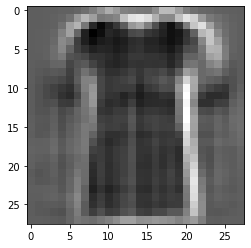

In [ ]:
components_generated = gmm2.sample()[0]
returns_generated = pca_optimized_component.inverse_transform(components_generated)
img_ = returns_generated.reshape(28,28)
plt.set_cmap('gray')
plt.imshow(img_)

# Le aplicamos el pca inverso al modelo gmm, y ploteamos una imagen



---



---



##Ejercicio 2

Queréis hacer un sistema de búsqueda por similitud. Tenéis un dataset (FashionMNIST train) sobre el que podéis entrenar o calcular cosas. Ahora tenéis un dato arbitrario de input (imagen "query", cogida de FashionMNIST test) del cual queréis encontrar otro existente dentro de una base de datos (FashionMNIST test, sin la imagen "query") lo más similar posible al dato de input. Desarrolla el sistema y evalúa cualitativamente con ejemplos de su funcionamiento.

In [ ]:
# Descargo los datos de FashionMNIST y los separo en train y test
(x_train_or, y_train_or), (x_test_or, y_test_or) = fashion_mnist.load_data()

In [ ]:
x_train_or.shape

(60000, 28, 28)

In [ ]:
#normalizamos el 'x_train_or' y 'x_test_or'
x_train2MG = (x_train_or/255. - 0.5) * 2.
x_test2MG = (x_test_or/255. - 0.5) * 2.

In [ ]:
print(x_train2MG.max())
print(x_train2MG.min())

1.0
-1.0


In [ ]:
# red fully connected 
z_dim2MG = 100
h_dim2MG = 200

In [ ]:
# Creamos el encoder con 3 capas. Una Flatten y 2 densas. La primera densa con activación relu que activa la neurona solo si el input está por encima de cero
encoder2MG = Sequential([
    Flatten(input_shape=(28,28,)),
    Dense(200, activation="relu"),
    Dense(z_dim2MG, activation='relu')
])


In [ ]:
encoder2MG.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
Total params: 177,100
Trainable params: 177,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Creamos el decoder con 2 capas densas una con activacion relu y otra con activación tanh que es versión desplazada y estirada del sigmoide con rango (-1,1) 
decoder2MG = Sequential([
    Dense(200, activation="relu", input_shape=(z_dim2MG, )),
    Dense(28*28, activation="tanh"),
    Reshape((28,28)),
])


In [ ]:
decoder2MG.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 dense_3 (Dense)             (None, 784)               157584    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 177,784
Trainable params: 177,784
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Creamos el autoencoder
autoencoder2MG = Sequential([encoder2MG, decoder2MG])
autoencoder2MG.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100)               177100    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            177784    
                                                                 
Total params: 354,884
Trainable params: 354,884
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compilamos y entrenamos el autoencoder dando un buen 'val_loss'
autoencoder2MG.compile("adam", "mse")

history2MG = autoencoder2MG.fit(x_train2MG, x_train2MG, 
                          batch_size=128, 
                          validation_data=(x_test2MG, x_test2MG), 
                          shuffle=True, 
                          epochs = 40)

Epoch 1/40
469/469 [==============================] - 9s 18ms/step - loss: 0.0932 - val_loss: 0.0545
Epoch 2/40
469/469 [==============================] - 9s 20ms/step - loss: 0.0484 - val_loss: 0.0445
Epoch 3/40
469/469 [==============================] - 9s 19ms/step - loss: 0.0415 - val_loss: 0.0398
Epoch 4/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0378 - val_loss: 0.0370
Epoch 5/40
469/469 [==============================] - 6s 14ms/step - loss: 0.0355 - val_loss: 0.0353
Epoch 6/40
469/469 [==============================] - 7s 15ms/step - loss: 0.0338 - val_loss: 0.0337
Epoch 7/40
469/469 [==============================] - 7s 15ms/step - loss: 0.0324 - val_loss: 0.0326
Epoch 8/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0313 - val_loss: 0.0315
Epoch 9/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0305 - val_loss: 0.0306
Epoch 10/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0299 - val_lo

In [ ]:
# utilizamos el encoder para codificar 'x_test2MG'
encoded_x_test2MG = encoder2MG.predict(x_test2MG)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Creamos una funcion para las distancias
def distance(a,b):
  return np.linalg.norm(a-b, axis=1)


In [ ]:
# Concretamos la posicion de una imagen con la que luego vamos a buscar sus parecidas
indice_seleccion = np.random.randint(0, len(x_test2MG))
indice_seleccion

6158

In [ ]:
#
selected_image = encoded_x_test2MG[indice_seleccion]
selected_image

array([0.        , 1.8341839 , 3.1414254 , 5.9203234 , 1.1648835 ,
       2.242442  , 0.        , 0.        , 0.        , 1.0299586 ,
       0.5705244 , 1.0084414 , 1.6188486 , 4.792111  , 2.143967  ,
       4.4965096 , 1.7126759 , 1.9012283 , 2.180587  , 1.6338254 ,
       1.0123442 , 3.2609782 , 1.6076684 , 7.214243  , 5.292457  ,
       0.        , 2.699073  , 0.        , 0.        , 3.861732  ,
       0.9271893 , 3.5322149 , 0.        , 0.8782543 , 1.1166874 ,
       0.86315614, 3.217188  , 2.6519198 , 0.8405441 , 0.        ,
       2.0423656 , 4.444309  , 1.511894  , 1.4100765 , 3.7368853 ,
       0.        , 2.304499  , 3.5302477 , 1.2260904 , 2.0301487 ,
       2.282009  , 0.        , 1.6473286 , 0.        , 1.3990893 ,
       1.2755412 , 0.7890328 , 0.        , 0.9021921 , 3.162068  ,
       3.322525  , 2.420177  , 0.7238473 , 1.8896945 , 1.8375074 ,
       0.580997  , 1.4814855 , 2.2971134 , 3.8644512 , 2.640211  ,
       0.5860745 , 3.8647609 , 0.        , 2.151044  , 3.16322

In [ ]:
# Calculamos las distancias entre la imagen seleccionada anteriormente y el resto de imagenes. Y nos devuelve una lista.
distances_list = distance(selected_image, encoded_x_test2MG)
distances_list

array([16.045275 , 20.149172 , 17.077831 , ..., 12.783442 , 13.1422415,
       13.759248 ], dtype=float32)

In [ ]:
# Quitamos la primera imagen ya que es la misma que la imagen seleccionada. Y nos devuelve por orden cuales son las mas parecidas
similar_img_positions = np.argsort(distances_list)[1:]
similar_img_positions

array([8503, 2387, 2424, ..., 2384, 3319, 1947])

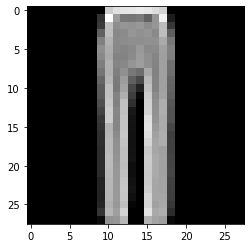

In [ ]:
# Ploteamos la imagen selecionada
plt.imshow(x_test2MG[indice_seleccion])

<Figure size 432x288 with 0 Axes>

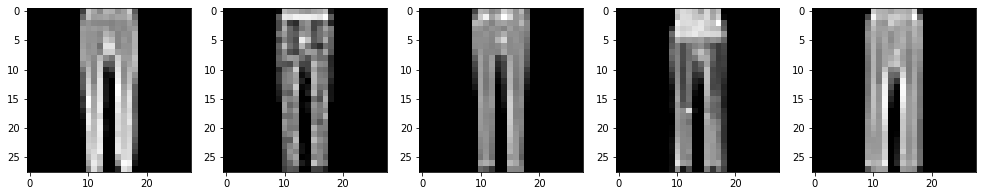

In [ ]:
# Mostramos las primeras 5 imagenes mas parecidas a la imagen seleccionada
plt.figure()
f,axarr = plt.subplots(1,5, figsize=(17,5))
for i in range(5):
  axarr[i].imshow(x_test2MG[similar_img_positions[i]])



---



---



## Ejercicio 3

Diseña un VAE para generar series de precios de las empresas constituyentes del S&P500.

In [ ]:
#Descargamos los datos, quitamos lo sna y le aplicamos un pivot para organizar por valores de índice/columna.
data = pd.read_csv('all_stocks_5yr.csv', index_col='date', parse_dates=True)
data_pivot = data.pivot(values="close", columns="Name")
data_clean = data_pivot.dropna(axis=1)
data_clean

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
2018-02-02,71.25,52.10,113.93,160.5000,115.17,96.02,61.69,156.90,195.64,89.11,...,38.25,70.64,84.53,60.06,31.63,75.66,82.63,125.79,54.15,76.78
2018-02-05,68.22,49.76,109.86,156.4900,109.51,91.90,58.73,151.83,190.27,85.40,...,37.68,66.97,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83


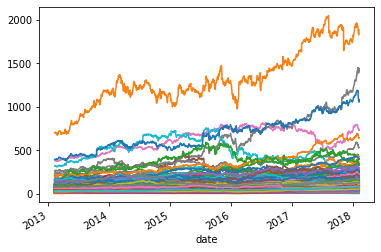

In [ ]:
data_clean.plot(legend=False)

In [ ]:
# Calculo los retornos y elimino la primer fila de NAN
datax = np.log(data_clean)
datax = datax.diff()
datax = datax.iloc[1:, :]
datax

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-11,-0.010705,-0.019857,-0.006485,0.010368,-0.011096,-0.002776,-0.004369,-0.003279,-0.012346,0.008281,...,0.002476,-0.001334,-0.003731,-0.000700,0.003762,0.013566,-0.011552,-0.002640,0.002896,0.006334
2013-02-12,0.000448,-0.013227,0.002675,-0.025386,-0.012067,0.004268,0.001167,0.004097,0.006449,0.004115,...,0.003526,0.003198,0.002037,0.000700,-0.003762,0.017687,0.003094,-0.002780,0.011499,0.014329
2013-02-13,0.002909,0.026963,0.004696,-0.001905,-0.004244,-0.006838,0.004654,0.002586,-0.002059,-0.000216,...,0.000352,0.005837,0.002371,0.004887,0.005013,0.011030,-0.005265,0.007396,0.010156,-0.005647
2013-02-14,-0.003806,-0.046780,-0.001648,-0.000900,0.036195,0.002783,0.006940,-0.005863,-0.005167,0.006035,...,-0.007062,0.016789,-0.001693,-0.003954,0.003743,0.007404,-0.008106,0.004464,-0.004456,-0.008381
2013-02-15,-0.053681,0.035806,0.002027,-0.013876,0.027244,-0.003641,0.010891,0.013986,0.000647,-0.007874,...,0.015820,-0.008360,-0.001809,-0.002567,-0.007500,-0.006696,0.001564,-0.005780,-0.011844,0.021116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.008205,-0.008133,0.002561,0.002088,0.036056,-0.003820,0.000322,-0.001495,-0.001904,-0.002506,...,-0.001358,-0.007285,0.020072,-0.001316,-0.041274,0.035082,-0.007237,0.008382,0.017430,0.014106
2018-02-02,-0.021933,-0.033594,-0.029065,-0.044360,-0.010108,-0.033488,-0.007912,-0.022436,-0.018936,-0.028105,...,0.038917,-0.025852,-0.052316,-0.011094,-0.034797,0.010897,-0.016206,-0.018900,-0.015212,-0.013454
2018-02-05,-0.043457,-0.045954,-0.036377,-0.025302,-0.050393,-0.043855,-0.049171,-0.032847,-0.027832,-0.042525,...,-0.015014,-0.053352,-0.058586,-0.025634,-0.007935,-0.040459,-0.034849,-0.020967,-0.047268,-0.039179


In [ ]:
# Capa de sampling.
class Sampling(Layer):
  def __init__(self):
    super(Sampling, self).__init__()

  def call(self, inputs): 
    mu, logstd = inputs
    std = tf.exp(logstd)
    epsilon = tf.random.normal(tf.shape(mu))
    return mu + epsilon * std

# Capa KL.
class KL(Layer):
  def __init__(self, beta=1):
    self.beta = beta
    super(KL, self).__init__()

  def call(self, inputs):
    mu, logstd = inputs
    kl_loss = 0.5 * (tf.square(mu) + tf.exp(logstd * 2.) - 1 - logstd * 2.)
    kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
    kl_loss *= self.beta
    self.add_loss(kl_loss)
    return inputs

In [ ]:
# cojo las 470 columnas
input_shape = datax.T.shape[1:] 

h_dim = 200
z_dim = 100

In [ ]:
input_shape[0]

1258

In [ ]:
# Creo qel encoder
encoder_head = Sequential([
    Flatten(input_shape=input_shape),
    Dense(h_dim, activation = "relu"),
])

inp = Input(input_shape)
h = encoder_head(inp)

mu = Dense(z_dim)(h)
logstd = Dense(z_dim)(h)

muout, logstdout = KL()([mu, logstd])

z = Sampling()([muout, logstdout])

In [ ]:
encoder_mean = Model(inp, mu)
encoder_sample = Model(inp, z)

In [ ]:
encoder_sample.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1258)]       0           []                               
                                                                                                  
 sequential_3 (Sequential)      (None, 200)          251800      ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 100)          20100       ['sequential_3[0][0]']           
                                                                                                  
 dense_6 (Dense)                (None, 100)          20100       ['sequential_3[0][0]']           
                                                                                            

In [ ]:
#Creo el decoder
decoder3MG = Sequential([
    Dense(h_dim, activation = "relu", input_shape = (z_dim,)),
    Dense(input_shape[0], activation = "tanh"),
    Reshape(input_shape)
])

In [ ]:
decoder3MG.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 200)               20200     
                                                                 
 dense_8 (Dense)             (None, 1258)              252858    
                                                                 
 reshape_1 (Reshape)         (None, 1258)              0         
                                                                 
Total params: 273,058
Trainable params: 273,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Calculo el VAE
vae = Sequential([encoder_sample, decoder3MG])

In [ ]:
vae.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 100)               292000    
                                                                 
 sequential_4 (Sequential)   (None, 1258)              273058    
                                                                 
Total params: 565,058
Trainable params: 565,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compilo con un optimizador 'adam'
vae.compile(optimizer="adam", loss=lambda x, y: MSE(x, y)*input_shape[0])

In [ ]:
datax.T.shape

(470, 1258)

In [ ]:
#Entreno el modelo con 150 epocas metiendo los valores de datax.T
history = vae.fit(datax.T, datax.T, validation_split= 0.3, batch_size=64, epochs=150)

Epoch 1/150
6/6 [==============================] - 2s 119ms/step - loss: 74.4210 - val_loss: 55.9601
Epoch 2/150
6/6 [==============================] - 0s 44ms/step - loss: 50.2754 - val_loss: 39.1302
Epoch 3/150
6/6 [==============================] - 0s 39ms/step - loss: 35.0218 - val_loss: 29.3743
Epoch 4/150
6/6 [==============================] - 0s 35ms/step - loss: 28.5082 - val_loss: 25.7590
Epoch 5/150
6/6 [==============================] - 0s 32ms/step - loss: 24.4589 - val_loss: 22.3548
Epoch 6/150
6/6 [==============================] - 0s 46ms/step - loss: 21.3873 - val_loss: 19.2051
Epoch 7/150
6/6 [==============================] - 0s 40ms/step - loss: 18.3606 - val_loss: 16.3655
Epoch 8/150
6/6 [==============================] - 0s 25ms/step - loss: 16.1482 - val_loss: 14.7311
Epoch 9/150
6/6 [==============================] - 0s 24ms/step - loss: 14.3208 - val_loss: 13.4465
Epoch 10/150
6/6 [==============================] - 0s 23ms/step - loss: 12.6796 - val_loss: 12.149

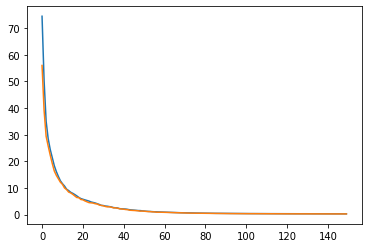

In [ ]:
# Representamos para ver como queda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# Genero series de precios de las empresas constituyentes del S&P500, como indica el enunciado
components_generated = np.array([np.random.randn(1, z_dim)[0] for _ in np.arange(470)])
returns_generated = decoder3MG.predict(components_generated)
prices_generated = np.vstack([np.log(data_clean.values[0:1]), returns_generated.T]).cumsum(axis=0)
prices_generated = np.exp(prices_generated)

15/15 [==============================] - 0s 9ms/step


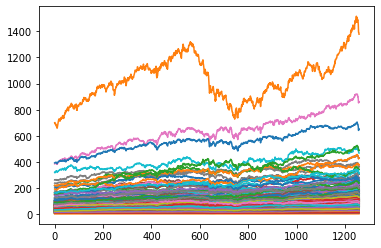

In [ ]:
# Represento los nuevos price_generated
plt.plot(prices_generated)



---



---



---



---



#TAREAS DEL MÓDULO DE RL


##Ejercicio 1

Utiliza el método de Q-learning usando una matriz para Q (no una función) para resolver el entorno del Black Jack de OpenAI Gym (“BlackjackEnv"). Busca los valores de los 3 parámetros (discount_factor, alpha, y epsilon) que minimizan el número de iteraciones en el entrenamiento (num_episodes) necesarios para conseguir finalizar el juego satisfactoriamente el mayor número de veces. Representa la politica a partir de la matriz Q para las combinaciones de “suma actual” y “Carta del dealer”. ¿Se le puede ganar a la banca?


In [ ]:
envBJ = gym.make('Blackjack-v1') #donde se guarda el entorno

In [ ]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [ ]:
def q_learning(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    Q-Learning algorithm: Off-policy TD control. Finds the optimal greedy policy
    while following an epsilon-greedy policy
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, episode_lengths).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Keeps track of useful statistics
    
    episode_lengths=np.zeros(num_episodes)
    episode_rewards=np.zeros(num_episodes)   
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        # Reset the environment and pick the first action
        state = env.reset()
        
        # One step in the environment
        # total_reward = 0.0
        for t in itertools.count():
            
            # Take a step
            action_probs = policy(state)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward, done, _ = env.step(action)

            # Update statistics
            episode_rewards[i_episode] += reward
            episode_lengths[i_episode] = t
            
            # TD Update
            best_next_action = np.argmax(Q[next_state])    
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
                
            if done:
                break
                
            state = next_state
    
    return Q, episode_lengths, episode_rewards

In [ ]:
def evaluate_policy(Q, episodes=10000):
    """
    Helper function which helps us evaluate how good our policy is.
    
    We do this by playing 10000 games of blackjack and returning the win ratio.
    """
    wins = 0
    for _ in range(episodes):
        state = envBJ.reset()
        
        done = False
        while not done:
            action = np.argmax(Q[state])
            
            state, reward, done, _ = envBJ.step(action)
            
        if reward > 0:
            wins += 1
        
    return wins/episodes

In [ ]:
def plot_policy(policy):

    def get_Z(player_hand, dealer_showing, usable_ace):
        if (player_hand, dealer_showing, usable_ace) in policy:
            return policy[player_hand, dealer_showing, usable_ace]
        else:
            return 1

    def get_figure(usable_ace, ax):
        x_range = np.arange(1, 11)
        y_range = np.arange(11, 22)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[get_Z(player_hand, dealer_showing, usable_ace) for dealer_showing in x_range] for player_hand in range(21, 10, -1)])
        surf = ax.imshow(Z, cmap=plt.get_cmap('Accent', 2), vmin=0, vmax=1, extent=[0.5, 10.5, 10.5, 21.5])
        plt.xticks(x_range, ('A', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
        plt.yticks(y_range)
        ax.set_xlabel('Dealer Showing')
        ax.set_ylabel('Player Hand')
        ax.grid(color='black', linestyle='-', linewidth=1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = plt.colorbar(surf, ticks=[0, 1], cax=cax)
        cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])
        cbar.ax.invert_yaxis() 
            
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(121)
    ax.set_title('Usable Ace', fontsize=16)
    get_figure(True, ax)
    ax = fig.add_subplot(122)
    ax.set_title('No Usable Ace', fontsize=16)
    get_figure(False, ax)
    plt.show()

In [ ]:
Q, stats_episode_lengths, stats_episode_rewards = q_learning(envBJ, 
                                                            50_000
                                                             )

Episode 50000/50000.

In [ ]:
evaluate = evaluate_policy(Q)
evaluate

0.4027

In [ ]:
def busqueda_parametros(gamma, alpha, epsilon):
  wins_rates = []
  params = []
  for d, a, e in itertools.product(gamma, alpha, epsilon):
    Q, *_ = q_learning(envBJ, 
                      15_000, 
                      discount_factor=d, 
                      alpha=a, 
                      epsilon=e)
    win_rate = evaluate_policy(Q)
    wins_rates.append(win_rate)
    params.append((d,a,e))
    print(f' d.f. {d}, alpha {a}, epsilon {e}, win rate {win_rate}')
  return wins_rates, params

gamma = [0.1, 0.5, 0.9]
alpha = [0.1, 0.5, 0.9]
epsilon = [0.1, 0.5, 0.9]


win_rates, params = busqueda_parametros(gamma, alpha, epsilon)


Episode 15000/15000. d.f. 0.1, alpha 0.1, epsilon 0.1, win rate 0.4243
Episode 15000/15000. d.f. 0.1, alpha 0.1, epsilon 0.5, win rate 0.4222
Episode 15000/15000. d.f. 0.1, alpha 0.1, epsilon 0.9, win rate 0.4268
Episode 15000/15000. d.f. 0.1, alpha 0.5, epsilon 0.1, win rate 0.3835
Episode 15000/15000. d.f. 0.1, alpha 0.5, epsilon 0.5, win rate 0.4075
Episode 15000/15000. d.f. 0.1, alpha 0.5, epsilon 0.9, win rate 0.4077
Episode 15000/15000. d.f. 0.1, alpha 0.9, epsilon 0.1, win rate 0.3198
Episode 15000/15000. d.f. 0.1, alpha 0.9, epsilon 0.5, win rate 0.3509
Episode 15000/15000. d.f. 0.1, alpha 0.9, epsilon 0.9, win rate 0.397
Episode 15000/15000. d.f. 0.5, alpha 0.1, epsilon 0.1, win rate 0.413
Episode 15000/15000. d.f. 0.5, alpha 0.1, epsilon 0.5, win rate 0.4111
Episode 15000/15000. d.f. 0.5, alpha 0.1, epsilon 0.9, win rate 0.4149
Episode 15000/15000. d.f. 0.5, alpha 0.5, epsilon 0.1, win rate 0.3805
Episode 15000/15000. d.f. 0.5, alpha 0.5, epsilon 0.5, win rate 0.3781
Episode 

In [ ]:
array_win_rate_ = np.array(win_rates)
array_params = np.array(params)

In [ ]:
idx_max = np.argmax(array_win_rate_)
best_params = array_params[idx_max]
gamma, alpha, epsilon = best_params

In [ ]:
Q, stats_episode_lengths, stats_episode_rewards = q_learning(envBJ, 
                                                             50_000,
                                                             gamma, 
                                                             alpha, 
                                                             epsilon
                                                             )

Episode 50000/50000.

In [ ]:
evaluate = evaluate_policy(Q)
evaluate

0.4365

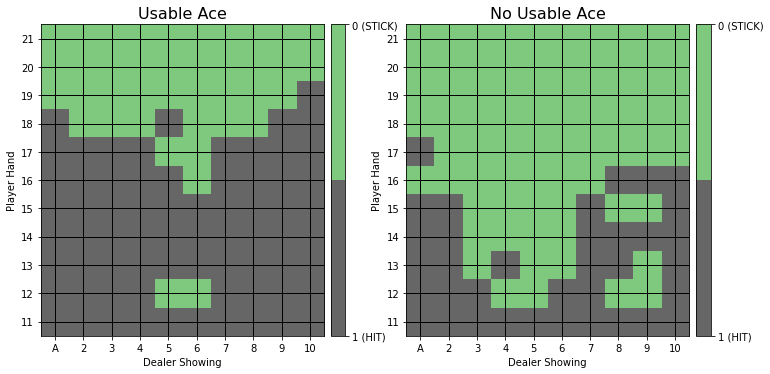

In [ ]:
policy = make_epsilon_greedy_policy(Q, epsilon, envBJ.action_space.n)
policy_Q = {key: np.argmax(policy(key)) for key in Q.keys()}
plot_policy(policy_Q)

In [ ]:
cumulative_rewards = stats_episode_rewards.sum()
cumulative_rewards

-17933.0



---



---



##Ejercicio 2

Resuelve el problema de 'Mountain Car' de OpenGym usando dos algoritmos de uno de los frameworks vistos en clase. Usa un algoritmo para el problema continuo ("MountainCarContinuous-v0") y otro para el problema discreto ("MountainCar-v0"). Compara los resultados.

In [ ]:
#PRIMER ALGORITMO

In [ ]:
envMCC = gym.make("MountainCarContinuous-v0")

In [ ]:
model1MCC1 = PPO('MlpPolicy',
                envMCC,
                batch_size= 256,
                n_steps= 8,
                gamma= 0.9999,
                learning_rate= 7.77e-05,
                ent_coef= 0.00429,
                clip_range= 0.1,
                n_epochs= 10,
                gae_lambda= 0.9,
                max_grad_norm= 5,
                vf_coef= 0.19,
                policy_kwargs= dict(log_std_init=-3.29, ortho_init=False)
                  )

/usr/local/lib/python3.8/dist-packages/stable_baselines3/ppo/ppo.py:151: UserWarning: You have specified a mini-batch size of 256, but because the `RolloutBuffer` is of size `n_steps * n_envs = 8`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 8
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=8 and n_envs=1)
  warnings.warn(


In [ ]:
mean_reward, std_reward = evaluate_policy(model = model1MCC1,
                                          env = envMCC,
                                          n_eval_episodes = 100)

print({mean_reward})
print({std_reward})

/usr/local/lib/python3.8/dist-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


{-1.2168873264454305}
{0.002385627422273701}


In [ ]:
model1MCC1.learn(total_timesteps=120_000)

In [ ]:
mean_reward, std_reward = evaluate_policy(model = model1MCC1,
                                          env = envMCC,
                                          n_eval_episodes = 100)

print({mean_reward})
print({std_reward})

{-0.00475761835964519}
{0.0006956621963009967}


In [ ]:
# SEGUNDO ALGORITMO

In [ ]:
envMC = gym.make("MountainCar-v0")

In [ ]:
modelMC = DQN("MlpPolicy", 
              envMC,          
              learning_rate = 4e-3,
              batch_size= 128,
              buffer_size= 10000,
              learning_starts= 1000,
              gamma =0.99,
              target_update_interval= 700,
              train_freq =15,
              gradient_steps =7,
              exploration_fraction= 0.2,
              exploration_final_eps= 0.07,
              policy_kwargs= dict(net_arch=[256, 256]),
              )

In [ ]:
mean_reward, std_reward = evaluate_policy(model = modelMC,
                                          env = envMC,
                                          n_eval_episodes = 100)

print({mean_reward})
print({std_reward})

{-200.0}
{0.0}


In [ ]:
modelMC.learn(total_timesteps=120000)

In [ ]:
mean_reward, std_reward = evaluate_policy(model = modelMC,
                                          env = envMC,
                                          n_eval_episodes = 100)

print({mean_reward})
print({std_reward})

{-110.23}
{18.937188281262877}


In [ ]:
#En este ejercicio he creado un entorno tanto para ("MountainCar-v0")  como para  ("MountainCarContinuous-v0").
# Seguidamente he creado 2 modelos (uno para cada entorno).
#En el caso de ("MountainCarContinuous-v0") he utilizado el algoritmo PPO y para  ("MountainCar-v0").
# Después los he evaluado antes y despues de entrenar para ver si han aprendido o no, y el resultado ha sido el siguiente:
# En el caso de ("MountainCarContinuous-v0") con PPO no ha aprendido casi nada. En cambio, ("MountainCar-v0") con DQN si lo ha hecho notablemente.



---



---



##Ejercicio 3

Resuelve el entorno de ATARI Boxing ("ALE/Boxing-v5"). Seleccciona uno de los algoritmos vistos en clase y entrenalo utilizando dos de los framework vistos en clase. Compara los resultados de los dos frameworks.


In [ ]:
#!pip install gym[atari,accept-rom-license]==0.21.0
#!pip install stable-baselines3[extra] ale-py==0.7.4
#!pip install gym[atari]
#!pip install autorom[accept-rom-license]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# There already exists an environment generator that will make and wrap atari environments correctly.
envB1 = make_atari_env('ALE/Boxing-v5', n_envs=4, seed=0)
# Stack 4 frames
envB1 = VecFrameStack(envB1, n_stack=4)

In [ ]:
#modelB1 = A2C('CnnPolicy', envB1, verbose=1) # Parametros
#modelB1.learn(total_timesteps=10000)

In [ ]:
#Primer Framework Stable_baseline3 DQN

In [ ]:
model3B = DQN("MlpPolicy", 
              envB1,          
              learning_rate = 4e-3,
              batch_size= 128,
              buffer_size= 10000,
              learning_starts= 1000,
              gamma = 0.99,
              target_update_interval= 700,
              train_freq =15,
              gradient_steps =7,
              exploration_fraction= 0.2,
              exploration_final_eps= 0.07,
              policy_kwargs= dict(net_arch=[256, 256]),
              )

In [ ]:
mean_reward, std_reward = evaluate_policy(model = model3B,
                                          env = envB1,
                                          n_eval_episodes = 100)

print({mean_reward})
print({std_reward})

{-46.8}
{9.528903399657278}


In [ ]:
model3B.learn(total_timesteps=80_000)

In [ ]:
mean_reward, std_reward = evaluate_policy(model = model3B,
                                          env = envB1,
                                          n_eval_episodes = 100)

print({mean_reward})
print({std_reward})

{-25.09}
{3.0036477822807393}


In [ ]:
#Segundo framework Dopamine DQN

In [ ]:
!pip install dopamine-rl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
modelDQNDopa = DQN("MlpPolicy", 
              envB1,
              learning_rate = 4e-3,
              batch_size= 128,
              buffer_size= 10000,
              learning_starts= 1000,
              gamma = 0.99,
              target_update_interval= 700,
              train_freq =15,
              gradient_steps =7,
              exploration_fraction= 0.2,
              exploration_final_eps= 0.07,
              policy_kwargs= dict(net_arch=[256, 256]),
              )

In [ ]:
mean_reward, std_reward = evaluate_policy(model = modelDQNDopa,
                                          env = envB1,
                                          n_eval_episodes = 100)

print({mean_reward})
print({std_reward})

{-98.84}
{7.117190456914864}


In [ ]:
modelDQNDopa.learn(total_timesteps=80_000)

In [ ]:
mean_reward, std_reward = evaluate_policy(model = modelDQNDopa,
                                          env = envB1,
                                          n_eval_episodes = 100)

print({mean_reward})
print({std_reward})

{-35.5}
{7.461233142048304}


In [ ]:
# En este problema selecciono el algoritmo DQN utilizando 2 framework diferentes, el primero es el anteriormente utilizado Satable_baseline3 y el segundo Dopamine.
# Siguiendo la metodologia del anterior ejercicio he creado 2 modelos  DQN con los mismos parametros para ver la diferencia.
# Después los he entrenado antes y despues de entrenarlos y sacar el siguiente resultado:
# Observamos que el primer algoritmo aprende mucho menos que el segundo utilizando los mismo parametros en 2 framework diferentes.



---



---

